In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

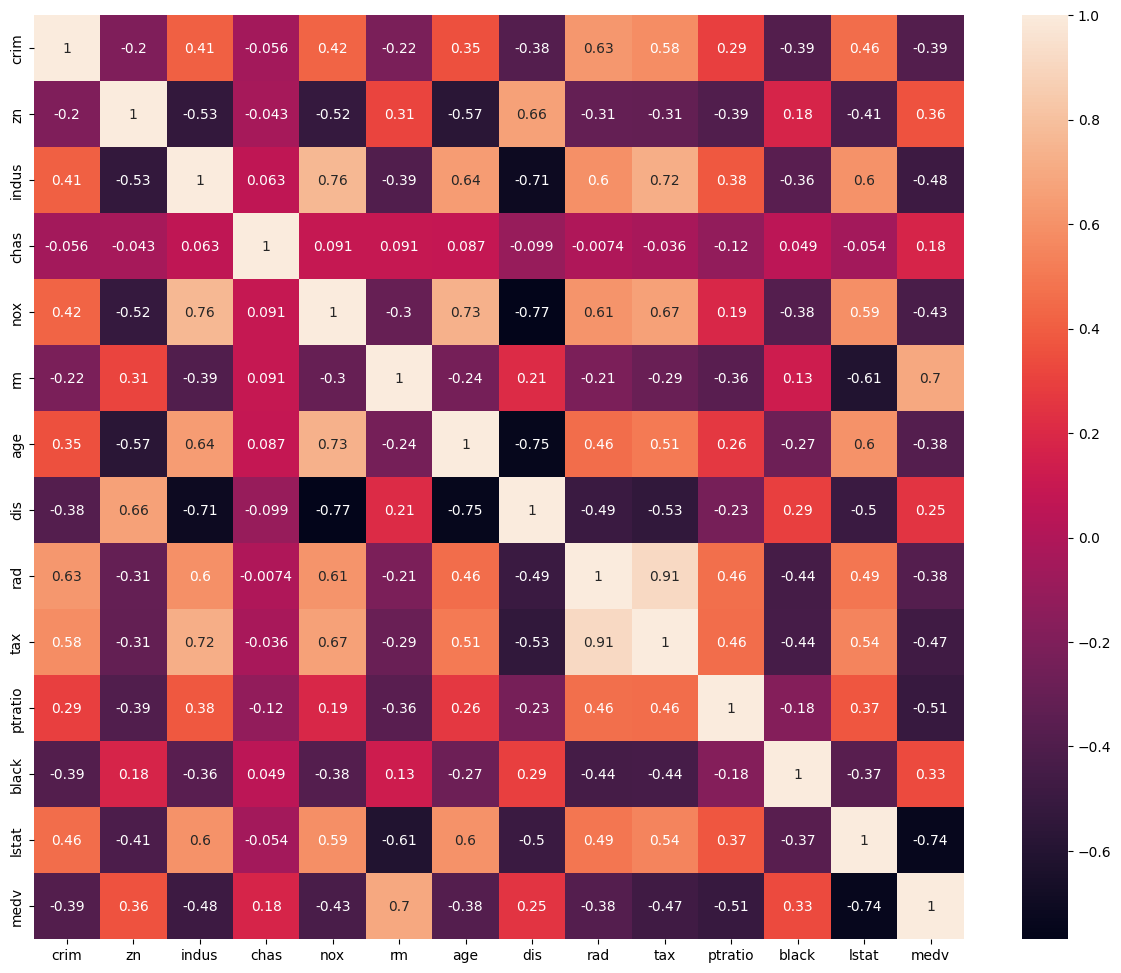

In [14]:
boston_house_price = pd.read_csv("./csv-files/boston-house-price.csv", header=0)
# We can see that `Unnamed: 0` is a sequential column and doesn't add any value to feature
# We can drop this column
boston_house_price.drop(boston_house_price.columns[0], axis=1, inplace=True)

correlation = boston_house_price.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=True)
plt.show()

In [18]:
features = boston_house_price.iloc[:, :13]
target = boston_house_price.iloc[:, -1]

In [19]:
rfr = RandomForestRegressor(n_estimators=1300)
rfr.fit(features, target)

RandomForestRegressor(n_estimators=1300)

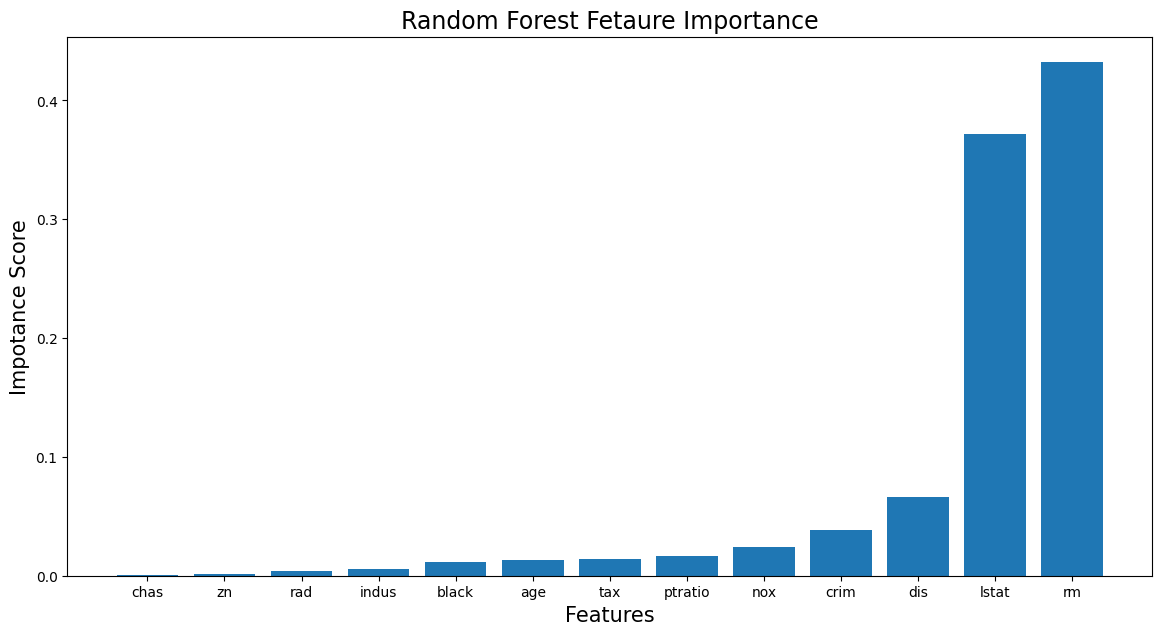

In [20]:
importance = rfr.feature_importances_

importance_df = pd.DataFrame({"Features": features.columns, "Importance": importance})
importance_df.set_index("Importance")

importance_df = importance_df.sort_values("Importance")
fig = plt.figure(figsize=(14, 7))
plt.bar(importance_df["Features"], importance_df["Importance"])
plt.xlabel("Features", fontsize=15)
plt.ylabel("Impotance Score", fontsize=15)
plt.title("Random Forest Fetaure Importance", fontsize=17)
plt.show()